In [255]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [256]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [257]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [258]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [259]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables. sql will read all tables and figure out all the classes.
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base. There are 2 classes
Base.classes.keys()

['measurement', 'station']

In [260]:
# Map Measurement class and Station class
Measurement = Base.classes.measurement
Station = Base.classes.station

In [261]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [262]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [263]:
# Find the most recent date in the data set.
Most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Most_recent_date

('2017-08-23')

In [265]:
# Find the oldest date in the data set.
first_date=session.query(Measurement.date).order_by(Measurement.date).first()
first_date

('2010-01-01')

In [266]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax (2017) in the data set
temperature_sample=calc_temps('2017-08-01', '2017-08-08')
temperature_sample

[(72.0, 79.15625, 83.0)]

In [271]:
temperature_sample_df=pd.DataFrame(temperature_sample, columns=['Temp_Min','Temp_Avg', 'Temp_Max'])
temperature_sample_df

,Temp_Min,Temp_Avg,Temp_Max
0,72.0,79.15625,83.0


In [272]:
avg_temp = temperature_sample_df.Temp_Avg
avg_temp 

0    79.15625
Name: Temp_Avg, dtype: float64

In [273]:
min_max_temp = temperature_sample_df.Temp_Max - temperature_sample_df.Temp_Min
min_max_temp=min_max_temp.values[0]
min_max_temp

11.0

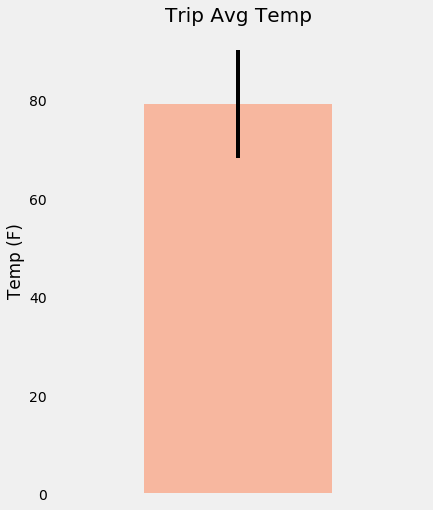

In [274]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

avg_temp.plot(kind = 'bar', yerr = min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.savefig('Trip Average Temp')

In [277]:
#choose the date of this year, now look for hystorical data in the dataset 
trip_start = dt.date(2016,8,1)
trip_end = dt.date(2016,8,8)

In [278]:
trip=trip_start.strftime('%Y-%m-%d')
trip

'2016-08-01'

In [279]:
trip_ending= trip_end.strftime('%Y-%m-%d')
trip_ending

'2016-08-08'

### Daily Rainfall Average

In [280]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates, sorted in the descending orderd

session.query(Measurement.station,func.sum(Measurement.prcp)).filter(Measurement.date > trip).filter(
    Measurement.date < trip_ending).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()


[('USC00516128', 2.44),
 ('USC00519281', 2.49),
 ('USC00514830', 1.03),
 ('USC00513117', 1.24),
 ('USC00519523', 0.76),
 ('USC00519397', 0.49),
 ('USC00517948', 0.18)]

In [281]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
same_station = session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(500).all()

#inner join on the station column. cross join and then filtering in SQLalchemy

for record in same_station:
    (measurement, station) = record
    print(measurement.station,station.station)

USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC0

In [282]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [283]:
start_date = '2016-08-01'
end_date = '2016-08-08'

In [284]:
# Use the start and end date to create a range of dates
date_time_range=pd.date_range(start_date, end_date)
date_time_range

DatetimeIndex(['2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04',
               '2016-08-05', '2016-08-06', '2016-08-07', '2016-08-08'],
              dtype='datetime64[ns]', freq='D')

In [285]:
date_list=date_time_range.strftime('%m-%d')

In [286]:
# Strip off the year and save a list of strings in the format %m-%d
list_dates=date_list.to_list()
list_dates

['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07', '08-08']

In [287]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [290]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Use the `daily_normals` function to calculate the normals for each date string and append the results to a list called `normals`.
normals = []

for record in list_dates:
#     print(daily_normals(record))
#     print(*daily_normals(record))
#     result = [[x[0], x[1], x[2]] for x in daily_normals(record)][0]
#     print(result)
    normals.append(*daily_normals(record))
#     normals.append(result)

#list to be called normals
normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (68.0, 76.5576923076923, 83.0)]

In [291]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df=pd.DataFrame(normals, columns = ['Tmin', 'Tavg', 'Tmax'])
data_df['Date']=list_dates
data_df.set_index(['Date'], inplace=True)
data_df

,Tmin,Tavg,Tmax
Date,,,
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0
08-08,68.0,76.557692,83.0


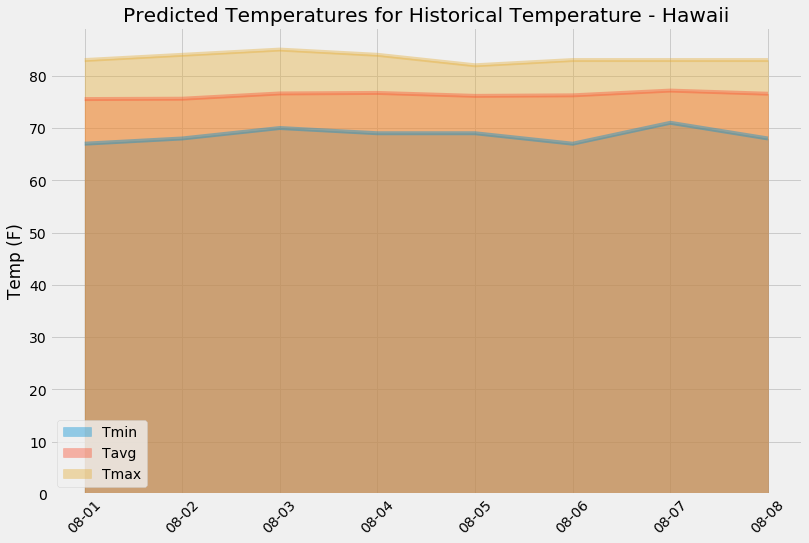

In [292]:
# Plot the daily normals as an area plot with `stacked=False`
data_df.plot(kind='area', stacked=False, alpha=0.4,figsize=(12, 8), rot=45, x_compat=True, title='Predicted Temperatures for Historical Temperature - Hawaii')
plt.ylabel("Temperature")
plt.legend(loc='best')
#make the labels
plt.xlabel('')
plt.ylabel('Temp (F)')
plt.savefig('Predicted Temperatures for Historical Temperature - Hawaii')
plt.show()

## Close Session

In [293]:
# Close Session
session.close()